# 07 - Deep Learning

## 05 - Face recognition

![](https://images.unsplash.com/photo-1504954096613-0ebd576c917e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)
Picture by [Luc van Loon](https://unsplash.com/photos/aiaNuzedKkE)

___

Face detection and recognition is used everyday by more and more companies. Some of the most famous applications could be the snapchat filters or the Apple faceID. Many other companies are based on this technology to monitor emotions, or countries like China to monitor citizens' behaviour.

# I. Face Detection

## I.1. Classical methods

Face detection has been widely used long before the rise of Deep Learning: in some cameras there was an embedded face detection algorithm before ConvNets were even created.

Those cameras were most likely using a so called **Haar Cascade Classifier**. This algorithm takes advantage of some features most faces share, e.g.:
- A mouth is a horizontal line
- Eyes region is darker than the cheeks
- Nose is a brighter vertical area
- Locations of nose, eyes, mouth...

To do so, Haar Cascade Classifier uses the following predefined features:

![](images/haar_cascade.png)



With those features, a face can be quite well detected in most of cases.

## I.2. Deep Learning methods

More recently, Deep Learning methods have proven to be more efficient than Haar Cascade to perform face detection in some tricky cases.

Why? Because features are not predefined, but trained, so they are more robust to variations, like pose, illumination, deformation... They are then closer to what you learnt about object detection.

## I.3. Application with OpenCV

OpenCV (for Open Computer Vision) is a famous library, coded in C++ but available in Python, that allows to do a lot of image processing and computer vision operations.
![](images/openCV-logo.png)

It can be installed with the following command:
`pip install opencv-python`

And then can be used using the following import in Python:
```Python
import cv2
```

It is really useful for doing face detection in just a few lines of code, since everything is already implemented. Both Haar Cascade and Deep Learning methods are implemented. We will here do it using Haar Cascade for simplicity.

The method we will use is `detectMultiScale` from the `CascadeClassifier` object.

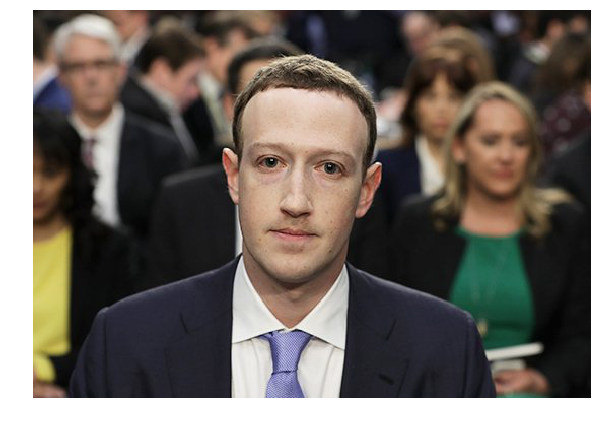

In [3]:
# Import opencv
import cv2
import matplotlib.pyplot as plt

# Load and display an image
img = plt.imread('images/Mark.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)
plt.show()

In [4]:
# Locate and get the path of the cascade classifier for face detection
FACE_CASCADE_PATH = "/usr/local/lib/python3.6/dist-packages/cv2/data/haarcascade_frontalface_default.xml"

# Instantiate a face cascade classifier
faceCascade = cv2.CascadeClassifier(FACE_CASCADE_PATH)

In [5]:
# Detect faces
faces = faceCascade.detectMultiScale(img)
print(faces)

[[ 27  31  63  63]
 [425 100  78  78]
 [179  91 165 165]]


This will return a list of arrays, with the following values `[x_min, y_min, width, height]`. We can now draw the boxes.

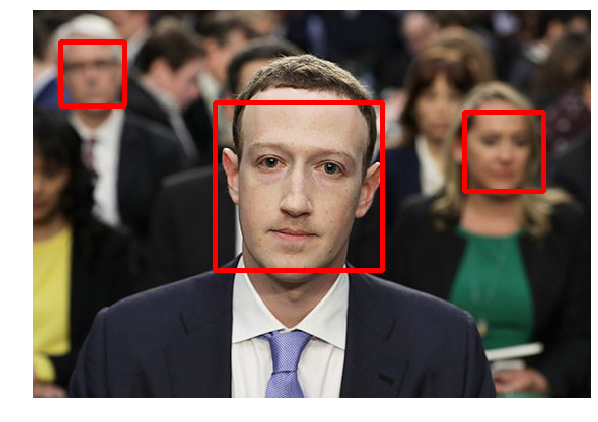

In [6]:
# Loop over each found face
for (x, y, w, h) in faces: 
    # Draw a box around the faces
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
    
# Display the result
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

To go further with Haar Cascade, you can go directly to the openCV documentation, which is excellent.

If you want to do the same using Deep Learning methods, you can follow [this tutorial](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/).


# II. Face Recognition

## II.1. Introduction

Face recognition is a tricky problem, because most of the time **you have only one picture per person**.
As you know, it usually takes thousands of pictures to recognize a cat from a dog for CNN. How to do with only one image? This is called a **one shot learning** problem.

One of the most common application is a face recognition the employees of a company. So indeed you have: 
- One picture per employee
- Probably not more than hundreds of pictures
- When a new employee is hired, you don't want to retrain all your network

So how would you answer that?

One way to do so is to compute a **distance** function.

Imagine a function like the following:
`distance(picture1, picture2)` that returns a value depending on the similarity. We would then add a threshold such that:
- if `distance(picture1, picture2)` $\le$ threshold: the pictures are of the same person
- if `distance(picture1, picture2)` > threshold: the pictures are of two different persons

The threshold would be a hyperparameter.

If we could compute such a function, we would not need to train on many pictures of the same person, right? We would just need to train it on many pictures of faces of anyone... We could train it in two steps: a CNN followed by a distance. Let's see how.




## II.2. Siamese Network

What we would do, is to have a neural network (ideally a CNN since we are handling images) that does the following:
![](images/siamese.png)

This CNN (made of Convolutional layer, Pooling Layer and Fully Connected layers) would return an embedding of our images.

And so in our example we would finally have the following condition:
- distance(f(x$_1$), f(x$_2$)) is large
- distance(f(x$_1$), f(x$_3$)) is close to zero

Indeed, images 1 and 3 are the same person, so the distance should be small. Images 1 and 2 are not, so the distance should be large!

How to train our neural network to compute such a function `f`? Using the **triplet loss**. This function `f` computes **encodings** of the faces.

## II.3. Triplet loss

The idea behind the triplet loss is to train your network to maximize the distance between two different faces, while minimizing the distance between two same faces. 

Let's say we have our three images of two persons. We will call one the **anchor**, one the **positive** sample and the last one (of a different person) the **negative** sample. What we want is that, after training, the anchor and positive are close, while anchor and negative are far.

![](images/triplet_loss.png)



The formula to do that is the following:

$$
{\displaystyle {\mathcal {L}}\left(Anchor,Positive,Negative\right)=\operatorname {max} \left({\|\operatorname {f} \left(Anchor\right)-\operatorname {f} \left(Positive\right)\|}^{2}-{\|\operatorname {f} \left(Anchor\right)-\operatorname {f} \left(Negative\right)\|}^{2}+\alpha ,0\right)}
$$

Where:
* $||\operatorname{f} (A)-\operatorname {f} (P)||^{2}$ is just the euclidian distance between $\operatorname{f} (A)$ and $\operatorname{f} (P)$
* $\alpha$ is a margin (an hyperparameter)

## II.4. Face Recognition in Python

Unfortunately, there is currently no tool completely integrated to OpenCV to perform face recognition. 

Among other libraries doing so, the [Face Recognition library](https://github.com/ageitgey/face_recognition) allows to perform face recognition very easily, and is under free license. This is what you will use today in the exercises.

To install it, you just have to run the following command:
`pip install face_recognition`

Once installed, you can get the encodings of an image using `face_encodings()` just like this:

In [7]:
import face_recognition

img = plt.imread('images/Mark.jpg')

image_encoding = face_recognition.face_encodings(img)

print('first face encoding:', image_encoding[0])

first face encoding: [-0.12728025  0.10572205  0.0930155  -0.0512253  -0.10175978  0.03947206
 -0.05248118 -0.05493097  0.04769263 -0.11813328  0.18653968  0.03226687
 -0.15964776  0.02361569  0.07130473  0.15940301 -0.10170107 -0.09033518
 -0.15823266 -0.07551889 -0.02494029  0.1272535  -0.07284992 -0.01543745
 -0.15566453 -0.29980227 -0.02361719  0.02804492  0.03829178  0.0343979
 -0.04745258  0.02514366 -0.11757338  0.02806336  0.01372193  0.11799251
 -0.06626932 -0.04123222  0.07267126  0.00381814 -0.16364069  0.09450389
  0.03214464  0.33044845  0.23592758 -0.01184301  0.11425602 -0.02671024
  0.06953455 -0.27523804  0.02731599  0.01425721  0.08298961  0.08996509
  0.02057039 -0.1806795  -0.00868806  0.18733039 -0.16999722  0.10197989
  0.04095119 -0.10877901  0.01431942 -0.08198903  0.28652412  0.11674315
 -0.13778481 -0.13674149  0.14728338 -0.13983744 -0.05132673 -0.03643629
 -0.1176534  -0.16226293 -0.31525666  0.10633661  0.33249104  0.15163715
 -0.18503167  0.05764746  0.009

The library will return as many face encodings as it finds faces on the image. Here, the library found two images:

In [8]:
print('number of faces found:', len(image_encoding))

number of faces found: 2


You can of course get the related position of those faces, using `face_locations()`:

In [9]:
faces = face_recognition.face_locations(img)

Where here the tuple is in the following order: `(top, right, bottom, left)`. You can of course draw them too:

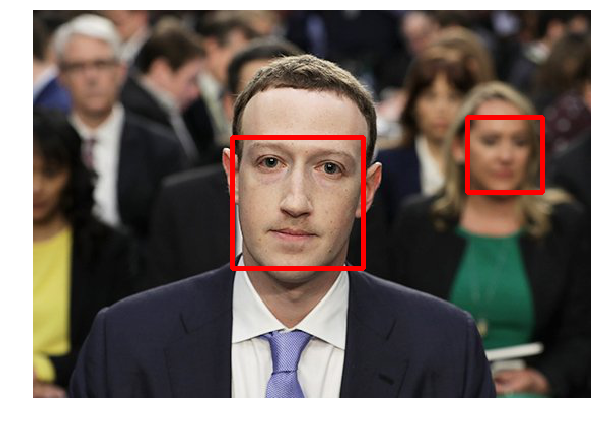

In [10]:
for (top, right, bottom, left) in faces: 
    # Draw a box around the faces
    cv2.rectangle(img, (left, top), (right, bottom), (255, 0, 0), 3)
    
# Display the result
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

Then, by computing the distances of the encodings (that you get using `face_encodings()`, you can perform face recognition. You will have to do it in the exercises!

# III. Facial Landmarks

## III.1. Landmarks

One last application closely related to face recognition and detection is the use of facial landmarks.

What are facial landmarks? Well, they are specific areas of the face, that allow to get features from the face of anyone. On the following image are one of the landmarks numbering convention:
![](images/landmark_numbers.jpg)

Why would I use landmarks? Well, for many applications actually, at least the following:
- Snapchat filters are based on landmarks
- Most emotions can be deduced from those landmarks


You can get them easily with the `face_recognition` library.

In [11]:
import face_recognition

img = plt.imread('images/Barack.jpg')

landmarks = face_recognition.face_landmarks(img)

landmarks[0]

{'chin': [(121, 96),
  (123, 113),
  (125, 130),
  (129, 145),
  (134, 161),
  (143, 175),
  (153, 187),
  (165, 197),
  (180, 199),
  (196, 194),
  (209, 183),
  (219, 170),
  (228, 156),
  (233, 141),
  (236, 125),
  (238, 108),
  (239, 91)],
 'left_eyebrow': [(131, 94), (137, 86), (147, 83), (158, 83), (169, 85)],
 'right_eyebrow': [(188, 84), (198, 81), (209, 81), (219, 83), (226, 89)],
 'nose_bridge': [(178, 96), (178, 107), (178, 117), (178, 128)],
 'nose_tip': [(165, 137), (171, 138), (177, 139), (184, 137), (191, 135)],
 'left_eye': [(143, 100),
  (149, 95),
  (156, 95),
  (162, 99),
  (156, 101),
  (149, 101)],
 'right_eye': [(195, 98),
  (201, 93),
  (208, 93),
  (215, 97),
  (208, 99),
  (201, 99)],
 'top_lip': [(154, 158),
  (163, 155),
  (171, 152),
  (177, 154),
  (184, 151),
  (193, 153),
  (203, 155),
  (200, 156),
  (184, 157),
  (178, 159),
  (171, 158),
  (158, 158)],
 'bottom_lip': [(203, 155),
  (194, 161),
  (185, 165),
  (178, 166),
  (172, 166),
  (163, 163),
  

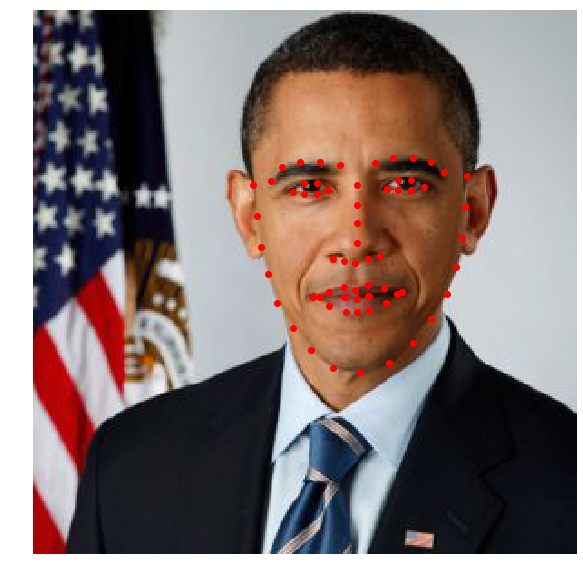

In [12]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img, cmap='gray')

for keys in landmarks[0]:
    for x,y in landmarks[0][keys]:
        plt.scatter(x,y,c='red')

plt.show()

## III.2. Action Units

The facial landmarks are a way to get the action units.

Action Units were developed by Ekman et al. in 1978, to describe the emotions through face expressions.

The theory of action units assumes that most of the emotions are expressed as a combination of some action units. So theoritically, the action units would allow to understand the emotions of persons.

A good representation of all the action units can be found [here](https://imotions.com/blog/facial-action-coding-system/). Some of them are really hard to simulate, while others can be done easily.

For example, happiness is known to be the Actions Units 6 (cheek raiser) and 12 (lip corner puller):
- AU6
![](images/AU6-cheek-raiser.gif)

- AU12
![](images/AU12.gif)

While having only the AU12 would be a fake smile...